<a href="https://colab.research.google.com/github/manishramamoorthy/Machine-Learning-Project/blob/main/2)_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary of Car Price Pridiction :**

Car Price Prediction is **Supervised Learning**.Car Price Prediction **Regression Problem**. The Vision of Car Price Prediction is **a Evaluate Car Selling Price**.

## **Content of car Price Prediction :**

1) Importing Libraries              
2) Load a Dataset            
3) Data Preprocessing

    -> 1) Top Five Rows of Dataset        
    -> 2) Last Five Rows of Dataset       
    -> 3) Shape of Dataset            
    -> 4) Data Types             
    -> 5) Information of Dataset          
    -> 6) Checking Missing Values of Dataset      
    -> 7) Droping Duplicates Values of Dataset      
    -> 8) Droping Unnecessary Columns           
    -> 9) Label Encoding                
4) EDA(Exploratory Data Analysis) 

    -> 1) Statistical Measures                 
    -> 2) Data Visualization  
5) Train and Test Split           
6) Feature Scaling             
7) Build a Model

    -> 1) Linear Regression       
    -> 2) Lasso Regression        
    -> 3) Ridge Regression        
8) Making Prediction           
9) Compare Actual Value and Predicted Values           
10) Evaluation Metrics                    

# **1) Importing Libraries :**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

# **2) Load a Dataset :**

In [2]:
data = pd.read_csv("/content/car+data.csv")

# **3) Data Preprocessing :**

**1) Top Five Rows of Dataset :**

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**2) Last Five Rows of Dataset :**

In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


**3) Shape of Dataset :**

In [5]:
data.shape
print("Number of Rows:",data.shape[0])
print("Number of Columns:",data.shape[1])

Number of Rows: 301
Number of Columns: 9


**4) Data Types :**

In [6]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

**5) Information of Dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**6) Checking Missing Values of Dataset**

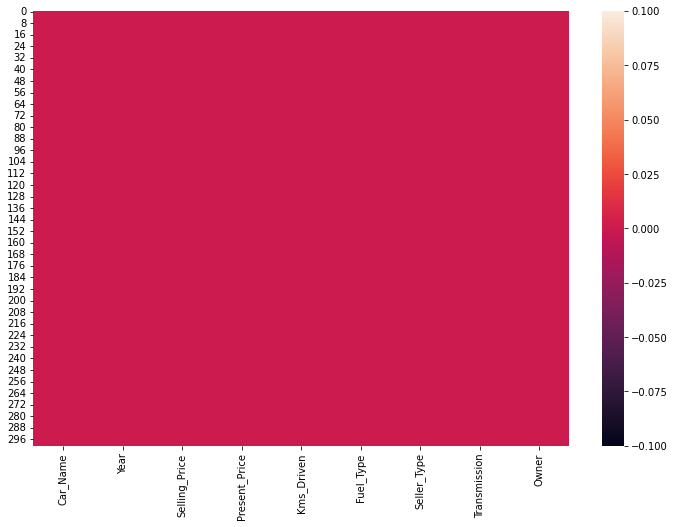

In [8]:
plt.figure(figsize = (12,8))
sns.heatmap(data.isnull())

In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**7) Droping Duplicates Values of Dataset**

In [10]:
data = data.drop_duplicates()
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


**8) Drop Unnecessary Columns**

In [11]:
data = data.drop(columns="Car_Name",axis=1)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**9) Label Encoding**

In [12]:
from sklearn.preprocessing import LabelEncoder
cols = ["Fuel_Type","Seller_Type","Transmission"]

le = LabelEncoder()
for col in cols:
  data[col] = le.fit_transform(data[col])

In [13]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


# **4) EDA (Exploratory Data Analysis)**

**1) Statistical Measures**

In [14]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,1.792642,0.354515,0.869565,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.422297,0.479168,0.337346,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


**2) Data Visualization**

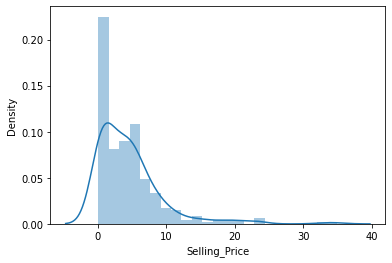

In [15]:
sns.distplot(data["Selling_Price"])

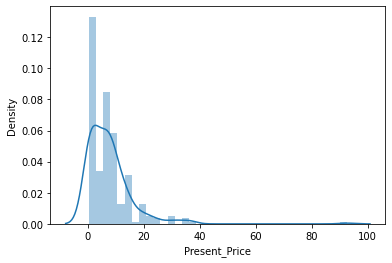

In [16]:
sns.distplot(data["Present_Price"])

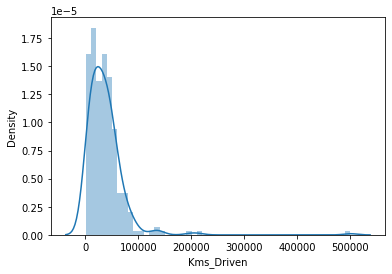

In [17]:
sns.distplot(data["Kms_Driven"])

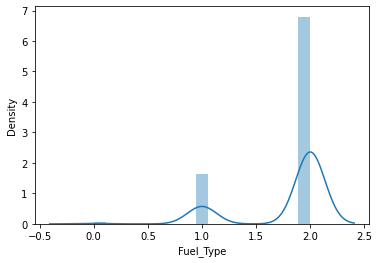

In [18]:
sns.distplot(data["Fuel_Type"])

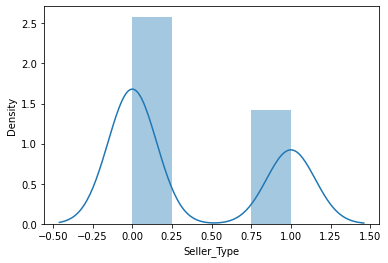

In [19]:
sns.distplot(data["Seller_Type"])

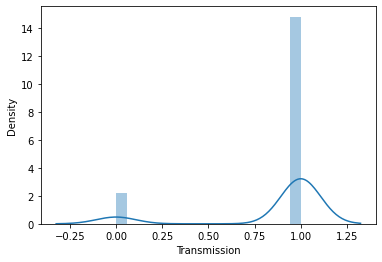

In [20]:
sns.distplot(data["Transmission"])

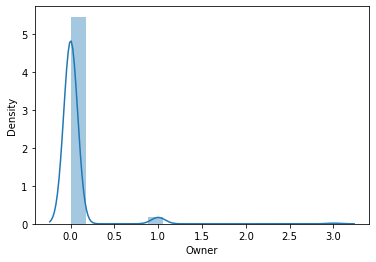

In [21]:
sns.distplot(data["Owner"])

In [22]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


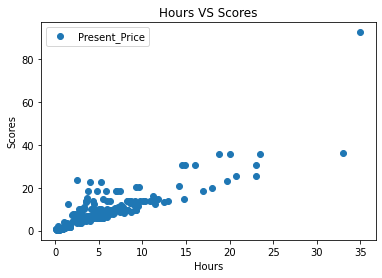

In [23]:
data.plot(x="Selling_Price",y="Present_Price",style="o")
plt.title("Hours VS Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [24]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.234369,-0.053563,-0.525714,-0.046210,-0.036820,0.003434,-0.181639
Selling_Price,0.234369,1.000000,0.876378,0.028566,-0.500292,-0.553851,-0.348869,-0.087880
Present_Price,-0.053563,0.876378,1.000000,0.205253,-0.431809,-0.511686,-0.334265,0.009947
Kms_Driven,-0.525714,0.028566,0.205253,1.000000,-0.167287,-0.101030,-0.163881,0.089367
Fuel_Type,-0.046210,-0.500292,-0.431809,-0.167287,1.000000,0.347922,0.068618,0.054174
Seller_Type,-0.036820,-0.553851,-0.511686,-0.101030,0.347922,1.000000,0.058669,0.123646
Transmission,0.003434,-0.348869,-0.334265,-0.163881,0.068618,0.058669,1.000000,-0.052166
Owner,-0.181639,-0.087880,0.009947,0.089367,0.054174,0.123646,-0.052166,1.000000


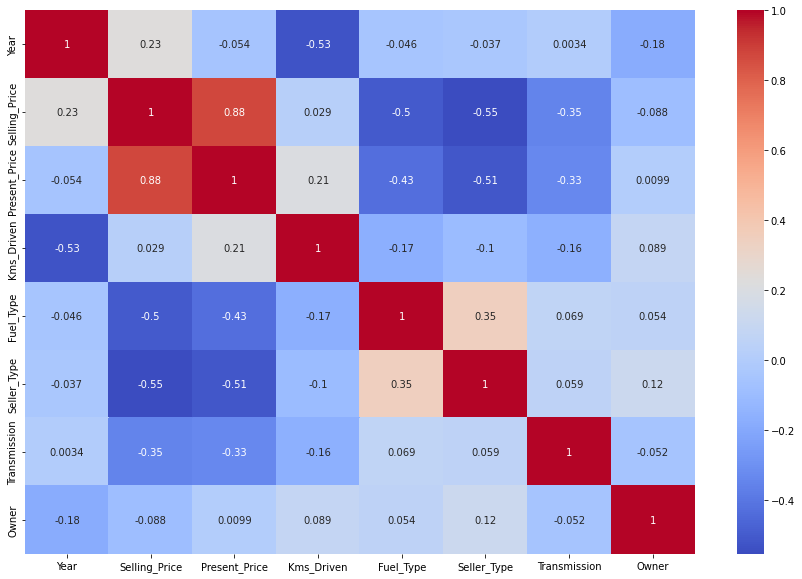

In [25]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")

# **5) Train and Test Split :**

In [26]:
X = data.drop(columns="Selling_Price",axis=0)
y = data["Selling_Price"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# **6) Feature Scaling :**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-9.07281520e-01, -1.81373989e-01,  1.47712902e-01,
         4.79671619e-01, -7.55928946e-01,  3.76930369e-01,
        -1.99501867e-01],
       [ 7.97950833e-01, -3.77542187e-01, -2.77121993e-01,
         4.79671619e-01, -7.55928946e-01,  3.76930369e-01,
        -1.99501867e-01],
       [-2.25188579e-01, -1.60196740e-01, -6.35871461e-01,
         4.79671619e-01, -7.55928946e-01,  3.76930369e-01,
        -1.99501867e-01],
       [-9.07281520e-01, -6.09980490e-02, -1.21254790e-01,
         4.79671619e-01, -7.55928946e-01,  3.76930369e-01,
        -1.99501867e-01],
       [ 7.97950833e-01,  2.01214314e+00, -1.82714239e-01,
        -1.96548371e+00, -7.55928946e-01, -2.65300990e+00,
        -1.99501867e-01],
       [ 1.13899730e+00,  1.38574241e+00, -5.13141380e-01,
        -1.96548371e+00, -7.55928946e-01, -2.65300990e+00,
        -1.99501867e-01],
       [ 4.56904362e-01,  1.81379855e-02,  1.71314841e-01,
         4.79671619e-01, -7.55928946e-01, -2.65300990e+00,
        -1.9950186

# **7) Build a Model :**

**1) Linear Regression :**

In [29]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

**2) Lasso Regression**

In [30]:
from sklearn.linear_model import Lasso
LA = Lasso()
LA.fit(X_train,y_train)

Lasso()

**3) Ridge Regression**

In [31]:
from sklearn.linear_model import Ridge
RI = Ridge()
RI.fit(X_train,y_train)

Ridge()

# **8) Making Prediction :**

# y = m*X + c

**1) Linear Regression**

In [32]:
print(LR.intercept_) # c- Values
print(LR.coef_) # m- Values

-801.2903352633573
[ 4.01095327e-01  4.24874966e-01 -4.62152922e-06 -1.79538710e+00
 -1.06953100e+00 -1.44215578e+00  3.50449166e-01]


In [33]:
LR.predict([[2014,5.59,43000,1,0,1,0]])

array([5.45443545])

**2) Lasso Regression**

In [34]:
print(LA.intercept_) # c- Values
print(LA.coef_) # m- Values

-632.7942141981517
[ 3.14763813e-01  4.88570277e-01 -4.56581760e-06 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


In [35]:
LA.predict([[2014,5.59,43000,1,0,1,0]])

array([3.67488234])

**3) Ridge Regression**

In [36]:
print(RI.intercept_) # c- Values
print(RI.coef_) # m- Values

-805.1527230079915
[ 4.02906764e-01  4.27328077e-01 -4.44334339e-06 -1.73135427e+00
 -1.04670003e+00 -1.36429721e+00  3.04558415e-01]


In [37]:
RI.predict([[2014,5.59,43000,1,0,1,0]])

array([5.40354855])

# **9) Compare Actual Values and Predicted Values :**

**1) Linear Regression**

In [38]:
y_pred_LR = LR.predict(X_test)
y_pred_LR

array([ 2.50674736,  3.84763158,  3.54309903,  3.01827927, 16.17600762,
       14.25400704,  6.30918911,  8.01246884,  0.27252885,  5.711268  ,
        1.51570098,  6.14838133,  5.48161273,  6.1116213 ,  1.01700436,
        6.92767628, 16.43959152,  0.48415246,  0.37022786, 10.56547109,
        1.46285209,  5.03720889,  2.38328032,  5.06247477,  3.43490939,
        0.52779791,  3.74448148,  9.6925303 ,  1.50384847,  4.17527855,
       16.51218188,  6.68865667,  0.71828003,  1.3507457 ,  9.14324102,
        7.561461  ,  4.33031486,  0.67824571,  8.46597592, -1.95201544,
        7.95843855,  3.40367989, 10.13123451,  7.97105047,  7.54750398,
       -0.49737942,  1.06488717,  9.55025717,  6.19245242,  6.3203671 ,
        0.90313365,  5.83537729,  6.00501382,  4.09778686,  8.72974058,
        5.11989095,  8.80368504,  1.14120121,  2.01410126, 13.91318344,
        2.12979893, 15.63115586,  1.40054126,  2.78205253,  1.95026535,
        2.86102978,  3.32082189,  4.77894495,  3.40451325,  7.18

In [39]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_LR})
df

,Actual,Predicted
73,2.65,2.506747
20,2.85,3.847632
284,3.50,3.543099
213,2.90,3.018279
96,20.75,16.176008
...,...,...
21,4.90,5.100953
184,0.25,-1.444434
67,9.25,10.089752
91,11.25,9.845181


**2) Lasso Regression**

In [40]:
y_pred_LA = LA.predict(X_test)
y_pred_LA

array([ 2.78921933,  3.58533942,  3.66316045,  3.36890729, 14.04202289,
       11.67494319,  4.91824956,  8.36405536,  1.13679256,  5.88305963,
        2.12620115,  4.4987852 ,  5.45080565,  6.02613174,  1.69299113,
        3.7490654 , 14.98764013,  1.39286716,  0.03465795, 11.15162343,
        2.06917214,  5.4145275 ,  2.96720184,  4.83135316,  3.56659758,
        1.03333189,  4.53906802,  8.25011995,  2.11930871,  4.11096298,
       15.05935543,  5.12407436,  1.50964378,  1.60753134,  7.78894863,
        7.99998072,  4.2916572 ,  1.45612219,  6.8449754 , -0.65599958,
        8.31067639,  3.66816558,  9.6439111 ,  6.95400352,  7.98619195,
        0.55037535,  1.76025369,  8.62192381,  4.82918857,  4.95556127,
        1.60045007,  5.85535933,  6.21455466,  3.86551133,  9.66194333,
        3.589944  ,  9.73499642,  1.84321765,  2.54260228, 13.344574  ,
        2.34042797, 15.16409163,  2.28071259,  3.26588474,  2.47196603,
        2.91980815,  3.44149831,  3.19736618,  4.13438095,  5.50

In [41]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_LA})
df

,Actual,Predicted
73,2.65,2.789219
20,2.85,3.585339
284,3.50,3.663160
213,2.90,3.368907
96,20.75,14.042023
...,...,...
21,4.90,4.863174
184,0.25,-0.500762
67,9.25,9.602928
91,11.25,8.735278


**3) Ridge Regression** 

In [42]:
y_pred_RI = RI.predict(X_test)
y_pred_RI

array([ 2.51475336,  3.85716995,  3.54927822,  3.02690403, 16.09696202,
       14.1604918 ,  6.25115154,  8.04318156,  0.29010101,  5.73432442,
        1.53873288,  6.10859612,  5.49689761,  6.12930893,  1.03596088,
        6.81384337, 16.37959533,  0.50642925,  0.30492127, 10.60995266,
        1.48660319,  5.06111947,  2.40803078,  5.07729371,  3.44808506,
        0.50056873,  3.76984817,  9.66365664,  1.52865575,  4.18786862,
       16.44938692,  6.65309059,  0.73976528,  1.35289755,  9.11826963,
        7.59228669,  4.34446118,  0.69745112,  8.43146808, -1.93575106,
        7.99123444,  3.41472119, 10.11080667,  7.9171712 ,  7.57886779,
       -0.48160479,  1.08745952,  9.5045612 ,  6.15031816,  6.27330102,
        0.9319425 ,  5.8520901 ,  6.02804536,  4.10672086,  8.77533117,
        5.0699521 ,  8.84642467,  1.16290301,  2.03669969, 13.89127981,
        2.1314322 , 15.60119986,  1.42227805,  2.79588167,  1.97325323,
        2.8744838 ,  3.33500608,  4.7268956 ,  3.4241532 ,  7.13

In [43]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_RI})
df

,Actual,Predicted
73,2.65,2.514753
20,2.85,3.857170
284,3.50,3.549278
213,2.90,3.026904
96,20.75,16.096962
...,...,...
21,4.90,5.112594
184,0.25,-1.480119
67,9.25,10.070923
91,11.25,9.822768


# **10) Evaluation Matrics :**

**1) Linear Regression**

In [44]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred_LR))

R2-Score:  0.8557256031100906


**2) Lasso Regression**

In [45]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred_LA))

R2-Score:  0.8334601864076007


**3) Ridge Regression**

In [46]:
from sklearn import metrics
print("R2-Score: ",metrics.r2_score(y_test,y_pred_RI))

R2-Score:  0.8572585398724362
